In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.regularizers import l2


#Import Fashion MNSIT Data

In [76]:
fashion_mnsit = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnsit.load_data()

In [77]:
type(train_images)

numpy.ndarray

The data is loaded as numpy arrays, containing numbers between 0 and 255 denoting pixel values. These are 28x28 resolution images. 
The labels contain a number between 0 and 9 denoting a piece of clothing like boots, tshirt etc.


In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Expolratory data analysis

In [79]:
train_images.shape, train_labels.shape
#No missing values, 60k images in training

((60000, 28, 28), (60000,))

In [80]:
test_images.shape, test_labels.shape
#10k images in test, no missing values

((10000, 28, 28), (10000,))

In [81]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [82]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [83]:
train_images[0] # A 28x28 pixels image. 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [84]:
#Let's plot this image

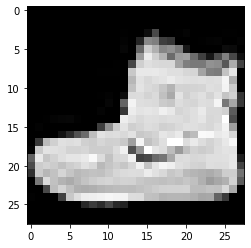

In [85]:
plt.imshow(train_images[0])
plt.gray()

Data Normalization

In [86]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [87]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Building the model

Set up the layers of our model. Keras needs the layers and their nodes to be defined prehand. We will use 2 hidden layers and an output layer. The output should have a softmax activation funtion. The hidden layers can have relu or tanh as activation functions.

In [88]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)), #The input layer does not count as number of layers
                             tf.keras.layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'tanh'),
                             tf.keras.layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'tanh'),
                             tf.keras.layers.Dense(10)
])

Define the loss function and the kind of optimizer. We can use SD, adam, momentum etc. 

In [89]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [90]:
#fix randomness in the code so that we can reproduce the same results
tf.random.set_seed(42)
np.random.seed(42)

#Training the model on train images data

In [91]:
tf.random.set_seed(42)
np.random.seed(42)
model.fit(train_images,train_labels, epochs = 15)

Epoch 1/15
  17/1875 [..............................] - ETA: 12s - loss: 4.9036 - accuracy: 0.4577

2022-05-23 23:48:37.721110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.0272 - accuracy: 0.7909
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6897 - accuracy: 0.8127
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6555 - accuracy: 0.8197
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6303 - accuracy: 0.8262
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6223 - accuracy: 0.8259
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6067 - accuracy: 0.8284
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6035 - accuracy: 0.8294
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5922 - accuracy: 0.8317
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5921 - accuracy: 0.8326
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5863 - accur

In [92]:
#Overall accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("Test accuracy:", test_acc)

2022-05-23 23:51:04.440576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.5825 - accuracy: 0.8329 - 1s/epoch - 4ms/step
Test accuracy: 0.8329000473022461


Gap between test and training accuracy: 93% and 88% - 5%. That means our model is overfitting a bit. 

In [93]:
#After applying the L2 regularization the gap is now almost closed.  

Making predictions using this model

In [94]:
predictions = model.predict(test_images)

2022-05-23 23:51:05.708106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [95]:
np.argmax(predictions[0])

9

In [96]:
test_labels[0]

9

In [97]:
#So our predictions are right. The output of prediction is a value as probability because I used the softmax as the last layer.

In [98]:
# I trained this model with and without L2 regularization and founc the that to generalize better, I would use the L2, even if it makes both the accuracies to drop.


In [99]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Shuffle rows, columns or both of the image pixels and lets see what the accuracy is

In [100]:
#Shuffle pixels in the train_images image array
for i in range(len(train_images)):
    train_images[i] = np.random.permutation(train_images[i])


In [101]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.71764706, 0.88235294,
        0.84705882, 0.8745098 , 0.89411765, 0.92156863, 0.89019608,
        0.87843137, 0.87058824, 0.87843137, 0.86666667, 0.8745098 ,
        0.96078431, 0.67843137, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.15686275, 0.23921569, 0.17254902,
        0.28235294, 0.16078431, 0.1372549 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.00392157, 0.        , 0.78431373, 0.90980392,
        0.90980392, 0.9137

In [102]:
tf.random.set_seed(42)
np.random.seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)), #The input layer does not count as number of layers
                             tf.keras.layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'tanh'),
                             tf.keras.layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'tanh'),
                             tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images,train_labels, epochs = 15)

Epoch 1/15
  18/1875 [..............................] - ETA: 11s - loss: 5.1807 - accuracy: 0.3264

2022-05-23 23:51:07.043332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 1.4272 - accuracy: 0.6361
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0600 - accuracy: 0.6660
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0168 - accuracy: 0.6770
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9984 - accuracy: 0.6816
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9827 - accuracy: 0.6848
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9683 - accuracy: 0.6911
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9656 - accuracy: 0.6923
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9557 - accuracy: 0.6938
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9510 - accuracy: 0.6963
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9504

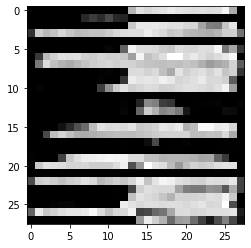

In [103]:
plt.imshow(train_images[0])

Accuracy for the shuffled features is less